Intro to Fourier Transform

Sources:

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/fourier_transform1.ipynb

https://www.youtube.com/watch?v=GKsCWivmlHg&t=9s

In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

# 1. Fourier Transform: Continuous time and frequency

Solving analytically using sympy

In [3]:
t, f = smp.symbols('t, f', real=True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [6]:
from sympy.integrals.transforms import fourier_transform
x_FT = fourier_transform(x, t, f)
x_FT

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

Solving numerically using scipy

In [8]:
from  scipy.integrate import quad

In [14]:
#Definiing the function we want the FT of
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t)*t**4

#Getting the FT which requires dividing the function into the real and complex parts
def get_x_FT(x, f, k):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real +1j*x_FT_comp

Get frequencies and fourier transform values

Text(0.5, 0, '$f$')

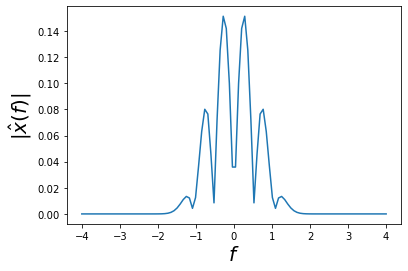

In [22]:
f = np.linspace(-4,4,100)
x_FT = np.vectorize(get_x_FT)(x, f, k=2)

plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)

# 2. Fourier Series: Contiuous time, discrete frequency

In [33]:
#Working between t=0 and t=1
t = smp.symbols('t', real=True)
k, n, T= smp.symbols('k, n, T', real=True, positive=True)
fn = n/T
x = smp.exp(-k * t)
x

exp(-k*t)

Compute the Fourier transform analytically

In [34]:
x_FT = smp.integrate(1/T * x * smp.exp(-2*smp.pi*smp.I*fn*t),(t, 0, T)).simplify()
x_FT

(1 - exp(-T*k - 2*I*pi*n))/(T*k + 2*I*pi*n)

In [37]:
smp.Abs(x_FT).simplify()

sqrt(-exp(-T*k - 2*I*pi*n) - exp(-T*k + 2*I*pi*n) + 1 + exp(-2*T*k))/sqrt(T**2*k**2 + 4*pi**2*n**2)

Convert to a numerical function so the values can be extracted numerically and plotted


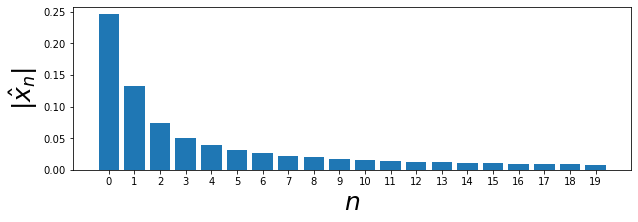

In [38]:
get_FT = smp.lambdify([k, T, n], x_FT)
ns = np.arange(0, 20, 1)
xFT = get_FT(k=1, T=4, n=ns)



plt.figure(figsize=(10,3))
plt.bar(ns, np.abs(xFT))
plt.xticks(ns)
plt.ylabel('$|\hat{x}_n|$', fontsize=25)
plt.xlabel('$n$', fontsize=25)
plt.show()

Compute the Fourier transform numerically

In [39]:
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t)/t

def get_x_FT(x, n, k, T):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*(n/T)*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*(n/T)*t))
    x_FT_real = quad(x_FT_integrand_real, 0, T)[0]
    x_FT_comp = quad(x_FT_integrand_comp, 0, T)[0]
    return x_FT_real + 1j*x_FT_comp

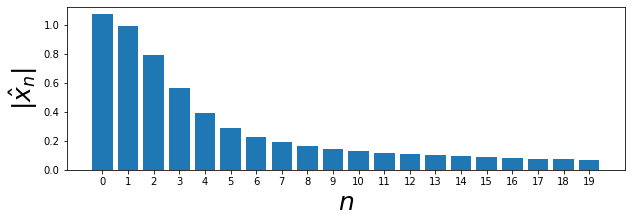

In [40]:
ns = np.arange(0, 20, 1)
xFT = np.vectorize(get_x_FT)(x, ns, k=2, T=4)

plt.figure(figsize=(10,3))
plt.bar(ns, np.abs(xFT))
plt.xticks(ns)
plt.ylabel('$|\hat{x}_n|$', fontsize=25)
plt.xlabel('$n$', fontsize=25)
plt.show()

# 3. Discrete Fourier Transform: Discrete time, discrete frequency

In [64]:
T = 40 #seconds
N = 100 #measurements
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

In [65]:
#Define a few specific frequencies
f1 = 20/(N*dt)
f2 = 10/(N*dt)
f3 = (10+5*N)/(N*dt)

f1, f2, f3

(0.49500000000000005, 0.24750000000000003, 12.6225)

In [66]:
#Create a few datasets
x1 = np.sin(2*np.pi*f1*t) + 0.3 * np.sin(2*np.pi*f2*t) + 0.3*np.random.random(len(t))
x2 = np.sin(2*np.pi*f2*t)+ 0.1*np.random.randn(len(t))
x3 = np.sin(2*np.pi*f3*t)+ 0.1*np.random.randn(len(t))

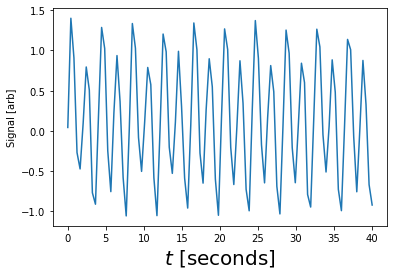

In [67]:
plt.plot(t, x1)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

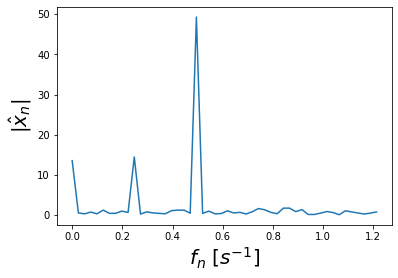

In [68]:
f = fftfreq(len(t), dt)
x1_FFT = fft(x1)

plt.plot(f[:N//2], np.abs(x1_FFT[:N//2]))
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()

Sampling rate can cause two very different frequencies to look the same

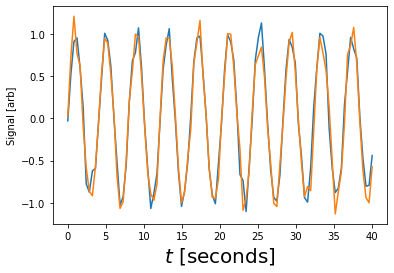

In [69]:
plt.plot(t,x2)
plt.plot(t,x3)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

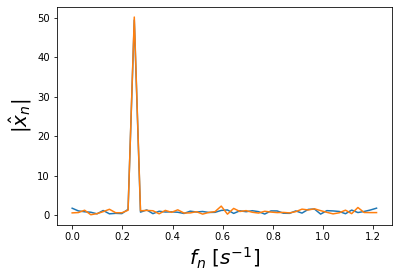

In [70]:
x2_FFT = fft(x2)
x3_FFT = fft(x3)

plt.plot(f[:N//2], np.abs(x2_FFT[:N//2]))
plt.plot(f[:N//2], np.abs(x3_FFT[:N//2]))
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()

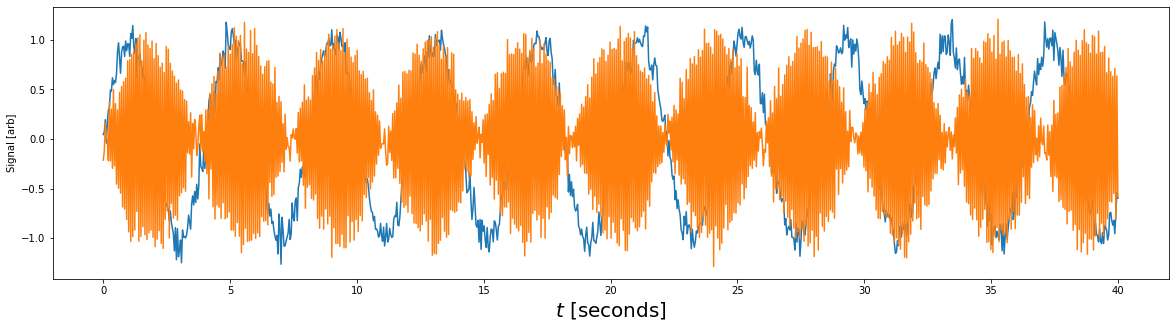

In [71]:
T = 40 #seconds
N = 1000 #measurements
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

x2 = np.sin(2*np.pi*f2*t)+ 0.1*np.random.randn(len(t))
x3 = np.sin(2*np.pi*f3*t)+ 0.1*np.random.randn(len(t))

plt.figure(figsize=(20,5))
plt.plot(t,x2)
plt.plot(t,x3)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

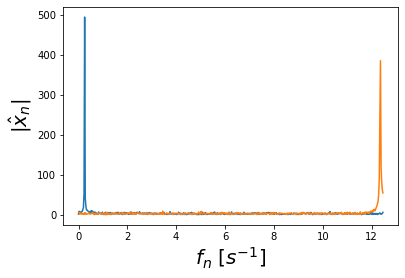

In [72]:
f = fftfreq(len(t), dt)

x2_FFT = fft(x2)
x3_FFT = fft(x3)

plt.plot(f[:N//2], np.abs(x2_FFT[:N//2]))
plt.plot(f[:N//2], np.abs(x3_FFT[:N//2]))
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()